In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Ver2での変更点

・tf.keras.preprocessing.image.imageDataGeneratorを使用して学習時にデータを水増し(回転、平行移動、マスキング)、バッチごとのデータ読み込み仕様に変更

・参照サイト
https://qiita.com/taichinakabeppu/items/74a27401cae0d0076941


# データ

以下のように、クラスごとに(Langston, ULEクラス)フォルダ分けされている状態から、2. コピー先のフォルダ階層のようにtrain, test階層の下にクラスごとの階層になっているようにデータを振り分けたい。その際、もとの階層でrunoff2.5内では1から順に識別番号がついていて、runoff5.0でも同じように1から順に識別番号がついているので混合されないように新たな名前を割りたい

1 元の階層

* image
    * Langston
        * runoff2.5
            * sample1
            * sample2
        * runoff5.0 
            * sample1
            * sample2
    * ULE
        * runoff2.5
            * sample1
            * sample2
        * runoff5.0 
            * sample1
            * sample2


2 コピー先のフォルダ階層

* image
    * train
        * Langston
        * ULE
    * test
        * Langston
        * ULE

In [5]:
import os
import shutil

src_dir = r'F:\miyata\RiverShapeRecognition_exp\image3' # 元の階層のパス
dest_dir = r'F:\miyata\RiverShapeRecognition_exp\image_for_datagen_ffwindow_comp' # 複製先のパス

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)

if not os.path.exists(os.path.join(dest_dir, 'train')):
    os.mkdir(os.path.join(dest_dir, 'train'))

if not os.path.exists(os.path.join(dest_dir, 'test')):
    os.mkdir(os.path.join(dest_dir, 'test'))

for cls_name in ['langston_ffwindow', 'ULE_ffwindow']:
    if not os.path.exists(os.path.join(dest_dir, 'train', cls_name)):
        os.mkdir(os.path.join(dest_dir, 'train', cls_name))
    if not os.path.exists(os.path.join(dest_dir, 'test', cls_name)):
        os.mkdir(os.path.join(dest_dir, 'test', cls_name))

    for seed in range(1, 2):
        src_cls_dir_seed = os.path.join(src_dir, cls_name, f"seed_{seed}") # seedの階層のパス

        for runoff in ['runoff_2.5']: #, 'runoff_1.5', 'runoff_5.0'
            src_cls_dir = os.path.join(src_cls_dir_seed, runoff) # 降水量の階層のパス
            # print(f"srs_cls_dir: {src_cls_dir}")

            # train, testに8:2で分割
            fileNum = len(os.listdir(src_cls_dir))
            trainNum = int(fileNum * 0.8)
            testNum = fileNum - trainNum
            randomList = np.random.permutation(fileNum)
            # 3回シャッフルしておく
            randomList = np.random.permutation(randomList)
            randomList = np.random.permutation(randomList)
            trainList = randomList[:trainNum]
            testList = randomList[trainNum:]
            
            for i, name in enumerate(os.listdir(src_cls_dir)):
                # print(f"name: {name}")
                if i in testList:
                    dst_dir = os.path.join(dest_dir, 'test', cls_name) # コピー先のtestディレクトリのクラスの階層のパス
                else:
                    dst_dir = os.path.join(dest_dir, 'train', cls_name) # コピー先のtrainディレクトリのクラスの階層のパス
                
                # print(f"dst_dir: {dst_dir}")
                charlist = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k",
                            "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", 
                            "v", "w", "x", "y", "z"]
                random_id = np.random.randint(0, len(charlist))
                src_path = os.path.join(src_cls_dir, name) # コピー元の画像のパス
                # new_name = f'{cls_name}_seed{seed}_{runoff}_{name}' # クラス名_降水量_元ファイル名で構成される新しいファイル名
                new_name = f'{cls_name}_seed{seed}_{runoff}_{charlist[random_id]}_{i}.jpg'
                # new_name = f'{cls_name}_seed{seed}_{runoff}_{i}.jpg'
                os.rename(src_path, os.path.join(src_cls_dir, new_name)) # コピー元のファイル名を変更
                src_path = os.path.join(src_cls_dir, new_name) # コピー元の画像のパス
                dst_path = os.path.join(dst_dir, new_name) # コピー先の画像のパス
                # print(f"src_path: {src_path}")
                # print(f"dst_path: {dst_path}")
                shutil.copyfile(src_path, dst_path) # コピー元の画像をコピー先にコピー

# only one seed version

In [4]:
import os
import shutil

src_dir = r'F:\miyata\RiverShapeRecognition_exp\image2' # 元の階層のパス
dest_dir = r'F:\miyata\RiverShapeRecognition_exp\image2_for_datagen' # 複製先のパス

if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)

if not os.path.exists(os.path.join(dest_dir, 'train')):
    os.mkdir(os.path.join(dest_dir, 'train'))

if not os.path.exists(os.path.join(dest_dir, 'test')):
    os.mkdir(os.path.join(dest_dir, 'test'))

for cls_name in ['langston_langston', 'ULE_ffwindow']:
    if not os.path.exists(os.path.join(dest_dir, 'train', cls_name)):
        os.mkdir(os.path.join(dest_dir, 'train', cls_name))
    if not os.path.exists(os.path.join(dest_dir, 'test', cls_name)):
        os.mkdir(os.path.join(dest_dir, 'test', cls_name))

    # for seed in range(1, 6):
    #     src_cls_dir_seed = os.path.join(src_dir, cls_name, f"seed_{seed}") # seedの階層のパス

    for runoff in ['runoff_2.5']: #, 'runoff_5.0'
        src_cls_dir = os.path.join(src_dir, cls_name, runoff) # 降水量の階層のパス
        # print(f"srs_cls_dir: {src_cls_dir}")

        # train, testに8:2で分割
        fileNum = len(os.listdir(src_cls_dir))
        trainNum = int(fileNum * 0.8)
        testNum = fileNum - trainNum
        randomList = np.random.permutation(fileNum)
        trainList = randomList[:trainNum]
        testList = randomList[trainNum:]
        
        for i, name in enumerate(os.listdir(src_cls_dir)):
            # print(f"name: {name}")
            if i in testList:
                dst_dir = os.path.join(dest_dir, 'test', cls_name) # コピー先のtestディレクトリのクラスの階層のパス
            else:
                dst_dir = os.path.join(dest_dir, 'train', cls_name) # コピー先のtrainディレクトリのクラスの階層のパス
            
            # print(f"dst_dir: {dst_dir}")
            
            src_path = os.path.join(src_cls_dir, name) # コピー元の画像のパス
            new_name = f'{cls_name}_{runoff}_{name}' # クラス名_降水量_元ファイル名で構成される新しいファイル名
            # new_name = f'{i}.jpg'
            os.rename(src_path, os.path.join(src_cls_dir, new_name)) # コピー元のファイル名を変更
            src_path = os.path.join(src_cls_dir, new_name) # コピー元の画像のパス
            dst_path = os.path.join(dst_dir, new_name) # コピー先の画像のパス
            # print(f"src_path: {src_path}")
            # print(f"dst_path: {dst_path}")
            shutil.copyfile(src_path, dst_path) # コピー元の画像をコピー先にコピー

# CNN

## ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255, # 画素値を0-1に変換
    validation_split=0.2, # 20%を検証用に使用
    height_shift_range=0.2, # 20%の範囲で上下にシフト
    width_shift_range=0.2, # 20%の範囲で左右にシフト
    rotation_range=180, # 180度まで回転
    horizontal_flip=True, # 水平方向に反転
    vertical_flip=True # 垂直方向に反転
    )

### 画像データの読み込み

In [5]:
def preprocess_input(x):

    # x = np.where(np.nan(x), 0, x)

    x_max = np.max(x)
    x -= x_max
    x_new = np.abs(x)

    if np.max(x_new) == 0:
        return x_new

    x_new /= np.max(x_new)
    x_new = x_new.astype('float16')
    return x_new

datagen = ImageDataGenerator(
    # rescale=1./255, # 画素値を0-1に変換
    validation_split=0.2, # 20%を検証用に使用
    height_shift_range=0.2, # 20%の範囲で上下にシフト
    width_shift_range=0.2, # 20%の範囲で左右にシフト
    rotation_range=180, # 180度まで回転
    horizontal_flip=True, # 水平方向に反転
    vertical_flip=True, # 垂直方向に反転
    preprocessing_function=preprocess_input # 画素値が1のところを0に変換したあとに絶対値をとる
)

batch_size=8
# save_augentation_dir = r'F:\miyata\RiverShapeRecognition_exp\augentation_someseed\train'
# save_augentation_val_dir = r'F:\miyata\RiverShapeRecognition_exp\augentation_someseed\validation'

# if not os.path.exists(save_augentation_dir):
#     os.makedirs(save_augentation_dir)
# if not os.path.exists(save_augentation_val_dir):
#     os.makedirs(save_augentation_val_dir)

shape = (256, 256)

# if not os.path.exists(save_augentation_dir):
#     os.makedirs(save_augentation_dir)

train_generator = datagen.flow_from_directory(
    r'F:\miyata\RiverShapeRecognition_exp\image2_for_datagen\train',
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    subset='training',
    #save_to_dir=save_augentation_dir,
    color_mode='rgb'
)

validation_generator = datagen.flow_from_directory(
    r'F:\miyata\RiverShapeRecognition_exp\image2_for_datagen\test',
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    subset='validation',
    #save_to_dir=save_augentation_val_dir,
    color_mode='rgb'
)

Found 1792 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [6]:
# train 画像データ
print("train 画像データ")
print(train_generator.image_shape)

# train ラベル
print("train_generator.class_indices")
print(train_generator.class_indices)

# train 全てのラベル
print("train_generator.classes")
print(train_generator.classes)

train 画像データ
(256, 256, 3)
train_generator.class_indices
{'ULE_ffwindow': 0, 'langston_langston': 1}
train_generator.classes
[0 0 0 ... 1 1 1]


[0. 0. 0. 1. 0. 0. 1. 0.]


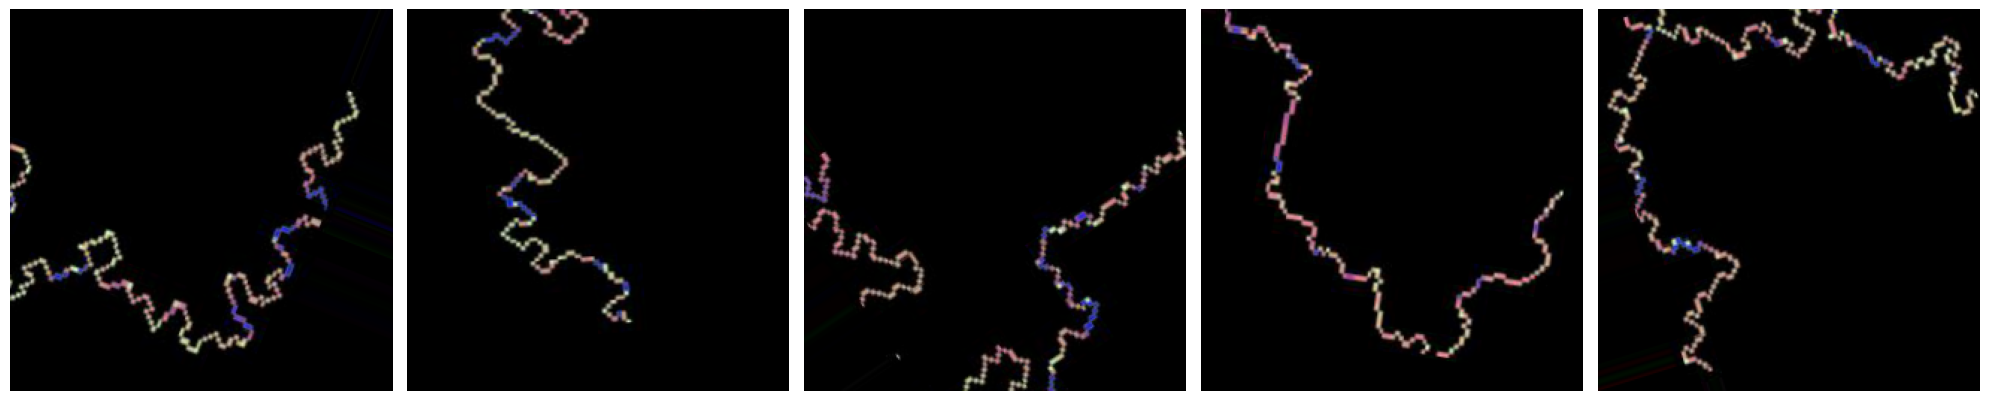

In [7]:
training_images, training_labels = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print(training_labels)
plotImages(training_images[:5])




In [9]:
np.unique(train_generator[0][0][0])

array([0.0000000e+00, 4.1723251e-07, 4.7683716e-07, ..., 9.8632812e-01,
       9.9316406e-01, 1.0000000e+00], dtype=float32)

## CNN(basic)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

# 畳み込み層1  
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(256, 256, 3),
                        kernel_initializer='he_normal', padding='same',
                        kernel_regularizer=keras.regularizers.l1(0.01),))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Dropout(0.5))

# 畳み込み層2
model.add(layers.Conv2D(64, kernel_size=3, activation='relu',
                        kernel_initializer='he_normal', padding='same',
                        kernel_regularizer=keras.regularizers.l1(0.01),)) 
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Dropout(0.5))

# 全結合層
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l1(0.01),))
model.add(layers.Dropout(0.5))

# 出力層
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l1(0.01),))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0

In [12]:
# チェックポイントの作成
# 検証セットで最高性能を達成したモデルを保存する
# 保存先は./testmodel
dirpath = "./testmodel"
if not os.path.exists(dirpath):
    os.mkdir(dirpath)
filepath = os.path.join(dirpath, "channelrecog.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath, save_best_only=True)

# 早期打ち切り
# 10エポック連続で検証セットで性能が向上しなければ、学習を打ち切る
ealystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint_cb, ealystopping_cb],
)

# 学習曲線をプロットする
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/5
224/224 [==============================] - 71s 304ms/step - loss: 67.1604 - accuracy: 0.4950 - val_loss: 40.1041 - val_accuracy: 0.5000
Epoch 2/5
224/224 [==============================] - 67s 301ms/step - loss: 39.6219 - accuracy: 0.5000 - val_loss: 39.9760 - val_accuracy: 0.5000
Epoch 3/5
 25/224 [==>...........................] - ETA: 54s - loss: 39.4365 - accuracy: 0.4600

KeyboardInterrupt: 

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = datagen.flow_from_directory(
    r'F:\miyata\RiverShapeRecognition_exp\image_for_datagen\test',
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    color_mode='grayscale'
)

model.evaluate(test_generator)

Found 560 images belonging to 2 classes.
70/70 [==============================] - 4s 63ms/step - loss: 0.1134 - accuracy: 0.9625


[0.1133575588464737, 0.9624999761581421]

## ResNet10

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

class ResidualUnit(keras.layers.Layer):

    def __init__(self, filters: int, strides: int=1, 
                 activation="relu", regularizer=keras.regularizers.l1(0.01),
                 **kwargs):

        """
        Paramerters
        -----------
        filters: int
            残差ユニットにおけるフィルター数
        strides: int
            ストライド数
        activation: str
            残差ユニット内の畳み込み層で使用される活性化関数
        """        
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.filters = filters
        self.strides = strides
        self.regularizer = regularizer

        # 残差ユニット内の順伝搬層を定義
        # 2個の畳み込み層とバッチ正規化層の組み合わせ
        # 畳み込み層では3×3のフィルターをfilters数だけ適用する
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                                padding="same", use_bias=False,
                                kernel_initializer="he_normal",
                                kernel_regularizer=regularizer),
            # keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                                padding="same", use_bias=False,
                                kernel_initializer="he_normal",
                                kernel_regularizer=regularizer),
            # keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
            # self.activation,
        ]

        # stridesが2以上の場合、画像サイズが1/strides倍になってしまい、
        # 単純に順伝搬層(main_layers)の出力と残差ユニットへの入力(input)を足すことができない
        # その場合、入力に対して1×1のカーネルサイズ、stridesでフィルターをかけて画像をリサイズ
        # strides<2なら空、2以上なら畳み込み層とバッチ正規化層が適用される仕様にする
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                padding="same", use_bias=False,
                                kernel_initializer="he_normal",
                                kernel_regularizer=regularizer
                            ),
                # keras.layers.BatchNormalization(),
                keras.layers.Dropout(0.5),
                # self.activation
            ]

    def call(self, inputs):
        Z = inputs

        # 順伝搬層を通過させる
        for layer in self.main_layers:
            # layerはkeras.layers.Layerオブジェクト
            # 以下の型式は関数型プログラミング
            Z = layer(Z)

        skip_Z = inputs

        # strides>2の場合にスキップ接続をリサイズ
        # strides<2の場合、self.layersは空
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)

        return self.activation(Z+skip_Z)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "activation": keras.activations.serialize(self.activation),
            "filters": self.filters,
            "strides": self.strides,
            "regularizer": self.regularizer
        })
        return config
    
start_reg_strength = 0.01 # モデルの初めの層の正則化の強さ
end_reg_strength = 0.00001 # モデルの最後の層の正則化の強さ
# keras.models.Sequential()を用いて実装
model = keras.models.Sequential()

# マップ数64, カーネルサイズ7, ストライド2
# 入力は224*224の3チャネル
model.add(keras.layers.Conv2D(8, 7, strides=2, input_shape=[256, 256, 1],
                              padding="same", use_bias=False,
                              kernel_initializer="he_normal",
                              kernel_regularizer=keras.regularizers.l1(start_reg_strength)))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
model.add(keras.layers.Dropout(0.5))

# 残差ユニットを追加
# マップ数64の残差ユニットを2
# マップ数128の残差ユニットを1
# マップ数256の残差ユニットを1
# マップ数512の残差ユニットを1
prev_filters = 8
filters_list =  [8]*1 + [16]*1 + [32]*1 #+ [64]*1 #+ [128]*1 #+ [512]*1
# regularizer_strengths = np.linspace(start_reg_strength, end_reg_strength, len(filters_list)) # 徐々に正則化の強さを下げる
regularizer_strengths = 10**(np.linspace(np.log10(start_reg_strength), np.log10(end_reg_strength), len(filters_list))) # 徐々に正則化の強さを変化させる

for filters, r_strengs in zip(filters_list, regularizer_strengths):
    # 前の残差ユニットとマップ数が等しければストライドは１, そうでなければ2
    # マップ数が増えれば画像サイズを小さくしていく
    regularizer = keras.regularizers.l1(r_strengs)
    strides = 1 if prev_filters == filters else 2
    model.add(ResidualUnit(filters=filters, strides=strides, regularizer=regularizer))
    prev_filters = filters

# model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal',
                             kernel_regularizer=keras.regularizers.l1(end_reg_strength),))


# optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=1e-5, clipvalue=1.0)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, clipvalue=1.0)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 8)       392       
                                                                 
 activation_1 (Activation)   (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 64, 64, 8)         0         
                                                                 
 residual_unit_6 (ResidualUn  (None, 64, 64, 8)        1152      
 it)                                                             
                                                                 
 residual_unit_7 (ResidualUn  (None, 32, 32, 16)      

In [11]:
regularizer_strengths

array([1.00000000e-02, 3.16227766e-04, 1.00000000e-05])

### load data

In [12]:
def preprocess_input(x):

    # x = np.where(np.nan(x), 0, x)

    x_max = np.max(x)
    x -= x_max
    x_new = np.abs(x)

    if np.max(x_new) == 0:
        return x_new

    x_new /= np.max(x_new)
    # x_new = np.where(x!=0, 1, 0).astype('int8')
    # x_new = 

    # # grayスケールに変換
    # gray = np.dot(x[...,:3], [0.299, 0.587, 0.114]).reshape(256, 256, 1)

    # # 画素値を0-1に変換
    # x_new = gray / 255

    # # 画素値が1のところを0に変換したあとに絶対値をとる
    # x_new = np.where(x_new==1, 0, 1).astype('int8')
    

    return x_new

datagen = ImageDataGenerator(
    # rescale=1./255, # 画素値を0-1に変換
    validation_split=0.2, # 20%を検証用に使用
    height_shift_range=0.2, # 20%の範囲で上下にシフト
    width_shift_range=0.2, # 20%の範囲で左右にシフト
    rotation_range=180, # 180度まで回転
    # horizontal_flip=True, # 水平方向に反転
    vertical_flip=True, # 垂直方向に反転
    preprocessing_function=preprocess_input # 画素値が1のところを0に変換したあとに絶対値をとる
)

batch_size=32
train_img_dir = r'F:\miyata\RiverShapeRecognition_exp\image_for_datagen_ffwindow_comp\train'
save_augentation_dir = r'F:\miyata\RiverShapeRecognition_exp\augentation\train'
save_augentation_val_dir = r'F:\miyata\RiverShapeRecognition_exp\augentation\validation'

if not os.path.exists(save_augentation_dir):
    os.makedirs(save_augentation_dir)
if not os.path.exists(save_augentation_val_dir):
    os.makedirs(save_augentation_val_dir)

shape = (256, 256)

if not os.path.exists(save_augentation_dir):
    os.makedirs(save_augentation_dir)

train_generator = datagen.flow_from_directory(
    train_img_dir,
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    subset='training',
    # save_to_dir=save_augentation_dir,
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_directory(
    train_img_dir,
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    subset='validation',
    # save_to_dir=save_augentation_val_dir,
    color_mode='grayscale'
)

Found 3549 images belonging to 2 classes.
Found 887 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'ULE_ffwindow': 0, 'langston_ffwindow': 1}

[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0.]


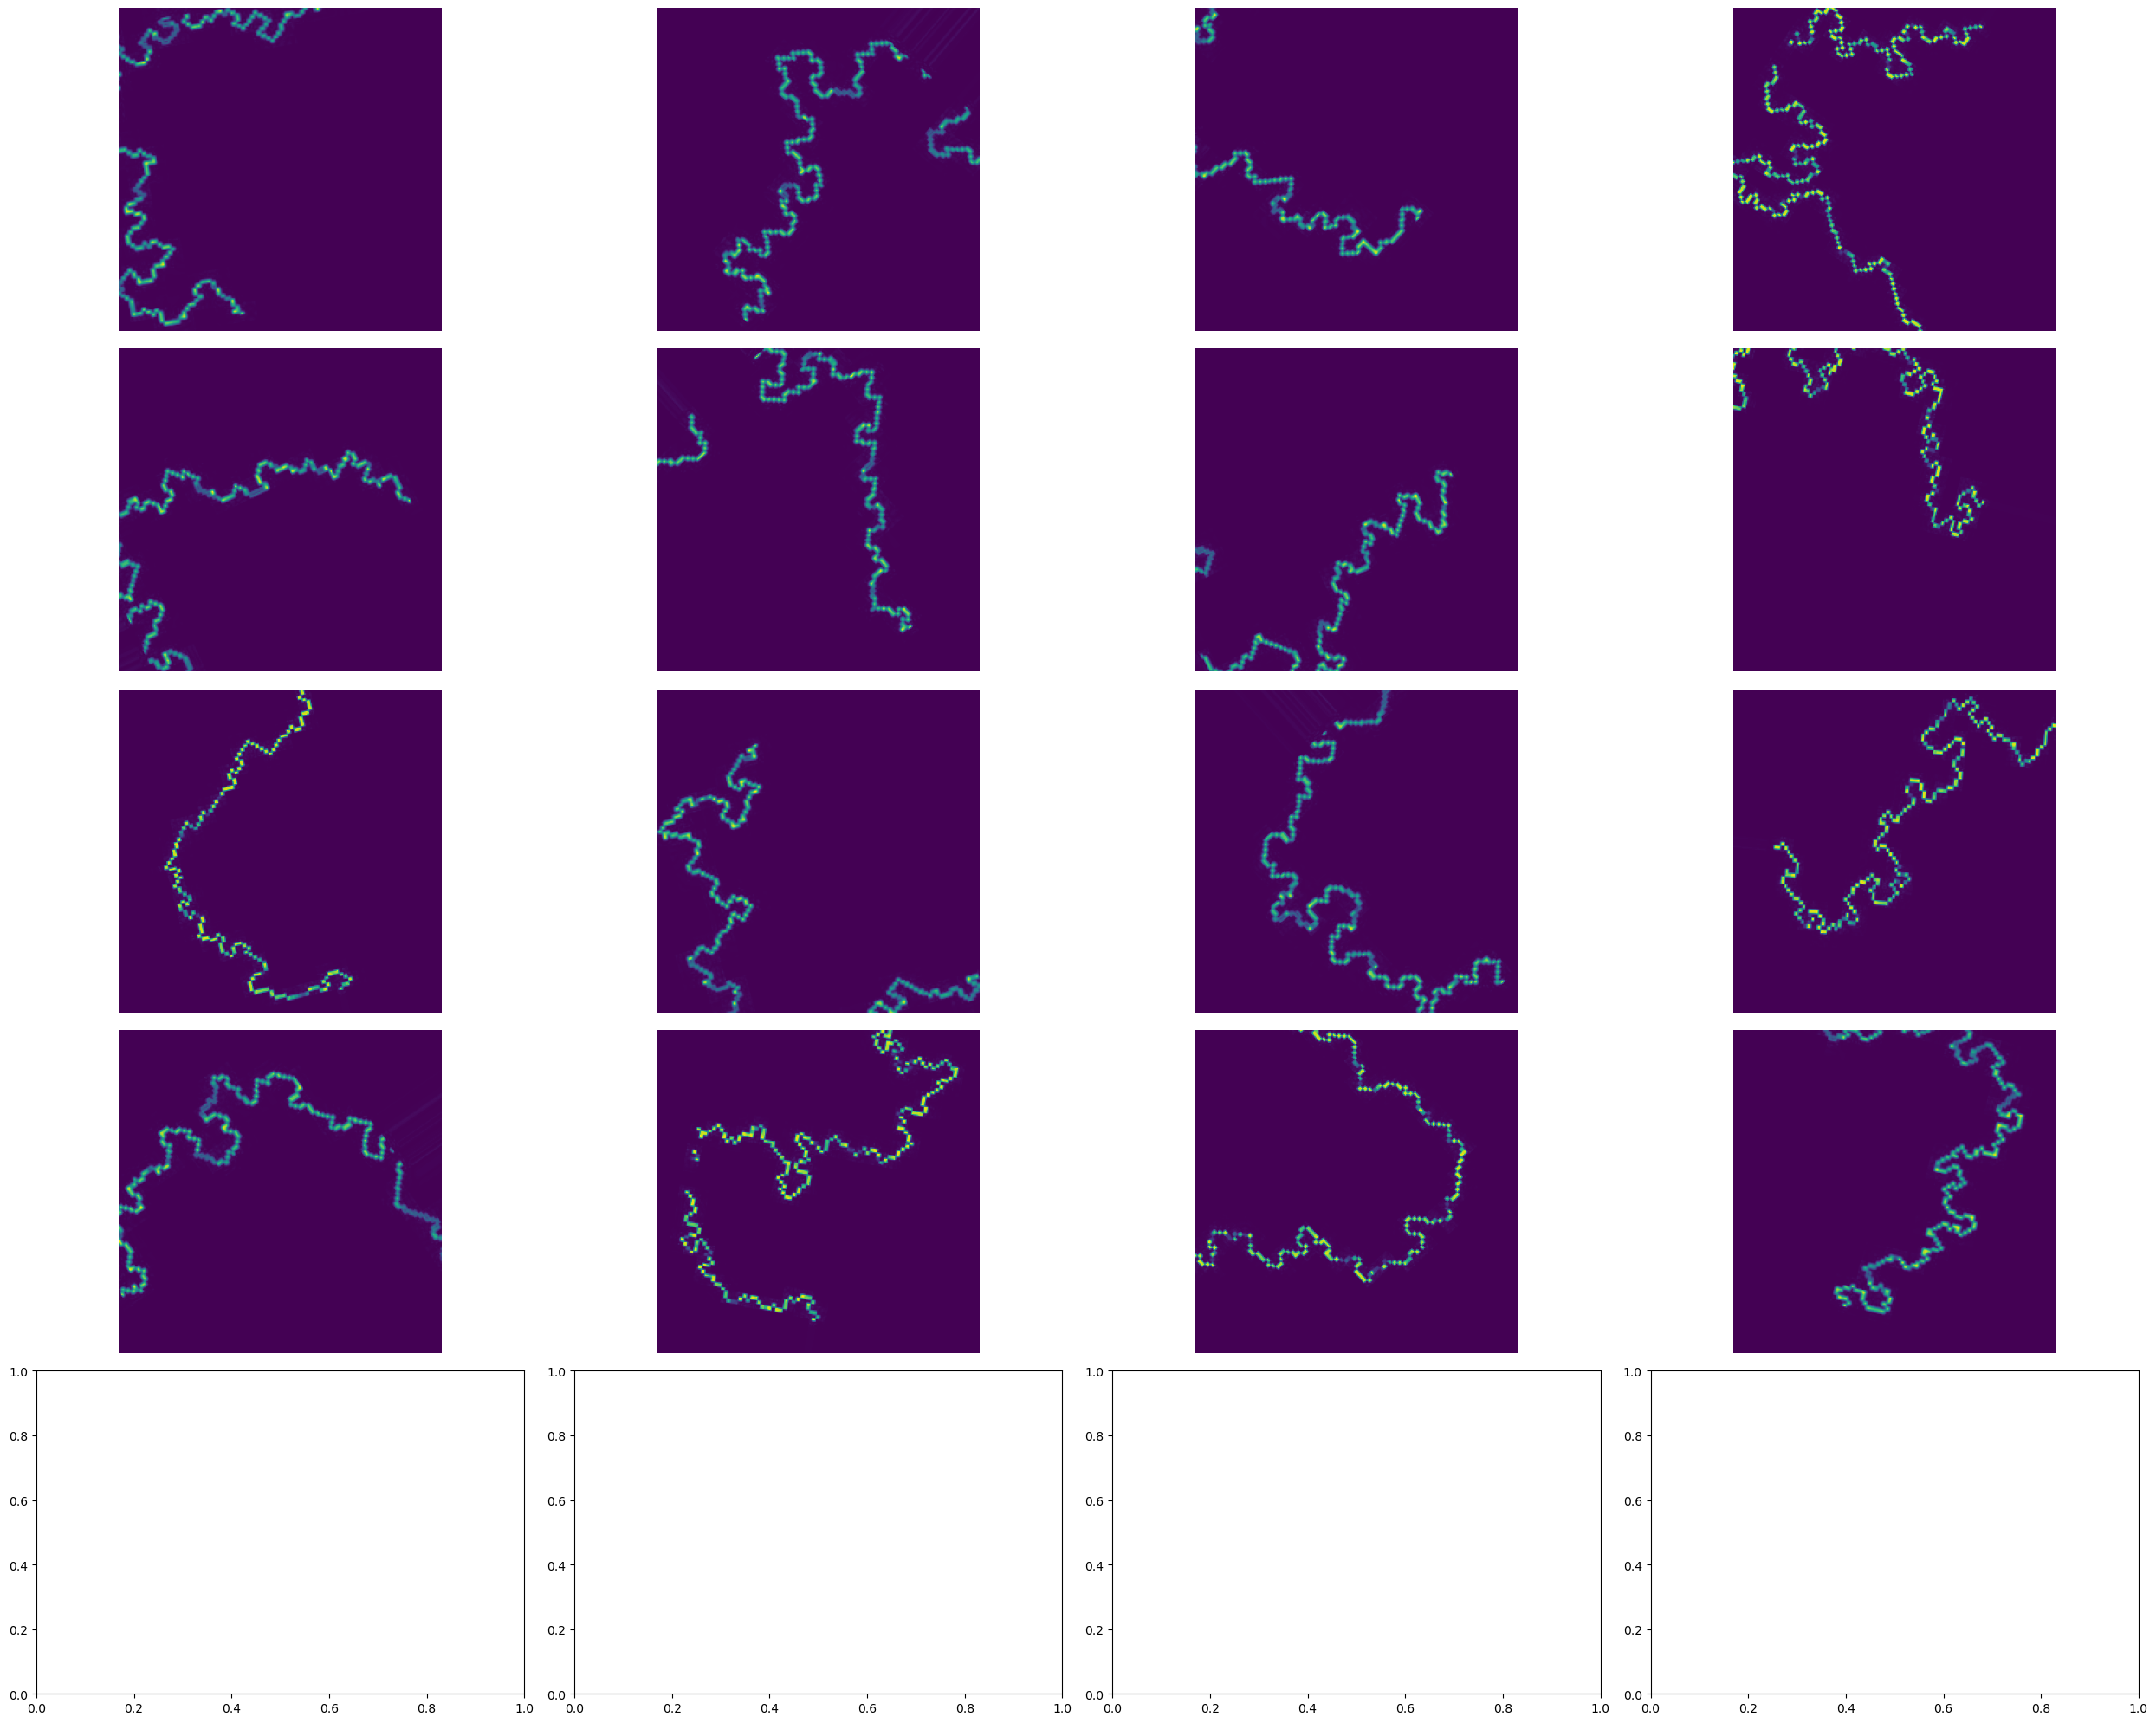

In [8]:
training_images, training_labels = next(train_generator)

def plotImages(images_arr):
    cols = 5
    rows = np.ceil(len(images_arr)/cols).astype('int')
    fig, axes = plt.subplots(cols, rows, figsize=(cols*5,rows*5))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print(training_labels)
plotImages(training_images[:16])




In [4]:
training_images[0].shape


(256, 256, 1)

### fit

In [15]:
# チェックポイントの作成
# 検証セットで最高性能を達成したモデルを保存する
# 保存先は./testmodel
dirpath = "./testmodel"
if not os.path.exists(dirpath):
    os.mkdir(dirpath)
filepath = os.path.join(dirpath, "channelrecog_resnet8_16_32_allL1_ffwindowonly.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath, save_best_only=True)

# 早期打ち切り
# 10エポック連続で検証セットで性能が向上しなければ、学習を打ち切る
ealystopping_cb = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[checkpoint_cb, ealystopping_cb],
)

# 学習曲線をプロットする
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/100
111/111 [==============================] - 18s 163ms/step - loss: 2.7138 - accuracy: 0.5489 - val_loss: 2.5574 - val_accuracy: 0.7046
Epoch 2/100
111/111 [==============================] - 18s 160ms/step - loss: 2.3587 - accuracy: 0.5838 - val_loss: 2.2901 - val_accuracy: 0.6359
Epoch 3/100
111/111 [==============================] - 18s 160ms/step - loss: 2.0422 - accuracy: 0.6058 - val_loss: 2.0265 - val_accuracy: 0.6280
Epoch 4/100
111/111 [==============================] - 18s 160ms/step - loss: 1.7328 - accuracy: 0.6951 - val_loss: 1.7802 - val_accuracy: 0.6584
Epoch 5/100
111/111 [==============================] - 18s 162ms/step - loss: 1.4435 - accuracy: 0.8957 - val_loss: 1.5451 - val_accuracy: 0.7339
Epoch 6/100
111/111 [==============================] - 18s 160ms/step - loss: 1.2013 - accuracy: 0.9763 - val_loss: 1.3279 - val_accuracy: 0.8343
Epoch 7/100
111/111 [==============================] - 18s 161ms/step - loss: 1.0013 - accuracy: 0.9918 - val_loss: 1.1397 -

KeyboardInterrupt: 

### evaluate

In [17]:
from keras.models import load_model
from keras.regularizers import L1


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = datagen.flow_from_directory(
    r'image_for_datagen_ffwindow_comp/test',
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    color_mode='grayscale'
)

model = keras.models.load_model(filepath, custom_objects={'ResidualUnit': ResidualUnit, "L1": L1})

model.evaluate(test_generator)

Found 1125 images belonging to 2 classes.
36/36 [==============================] - 8s 223ms/step - loss: 0.0818 - accuracy: 0.9902


[0.08178999274969101, 0.9902222156524658]

In [5]:
model.layers

In [18]:
from keras.models import load_model
from keras.regularizers import L1

# Assuming your model includes instance of an "AttentionLayer" class
model_path = r"F:\miyata\RiverShapeRecognition_exp\testmodel\channelrecog_resnet8_16_32_allL1_ffwindowonly.h5"
best_model = load_model(model_path, custom_objects={'ResidualUnit': ResidualUnit, "L1": L1})
best_model.summary()
# saved_model = keras.models.load_model(r"F:\miyata\RiverShapeRecognition_exp\testmodel\channelrecog_resnet10.h5")
# saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 8)       392       
                                                                 
 activation_1 (Activation)   (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 64, 64, 8)         0         
                                                                 
 residual_unit_6 (ResidualUn  (None, 64, 64, 8)        1152      
 it)                                                             
                                                                 
 residual_unit_7 (ResidualUn  (None, 32, 32, 16)      

### weights distribution

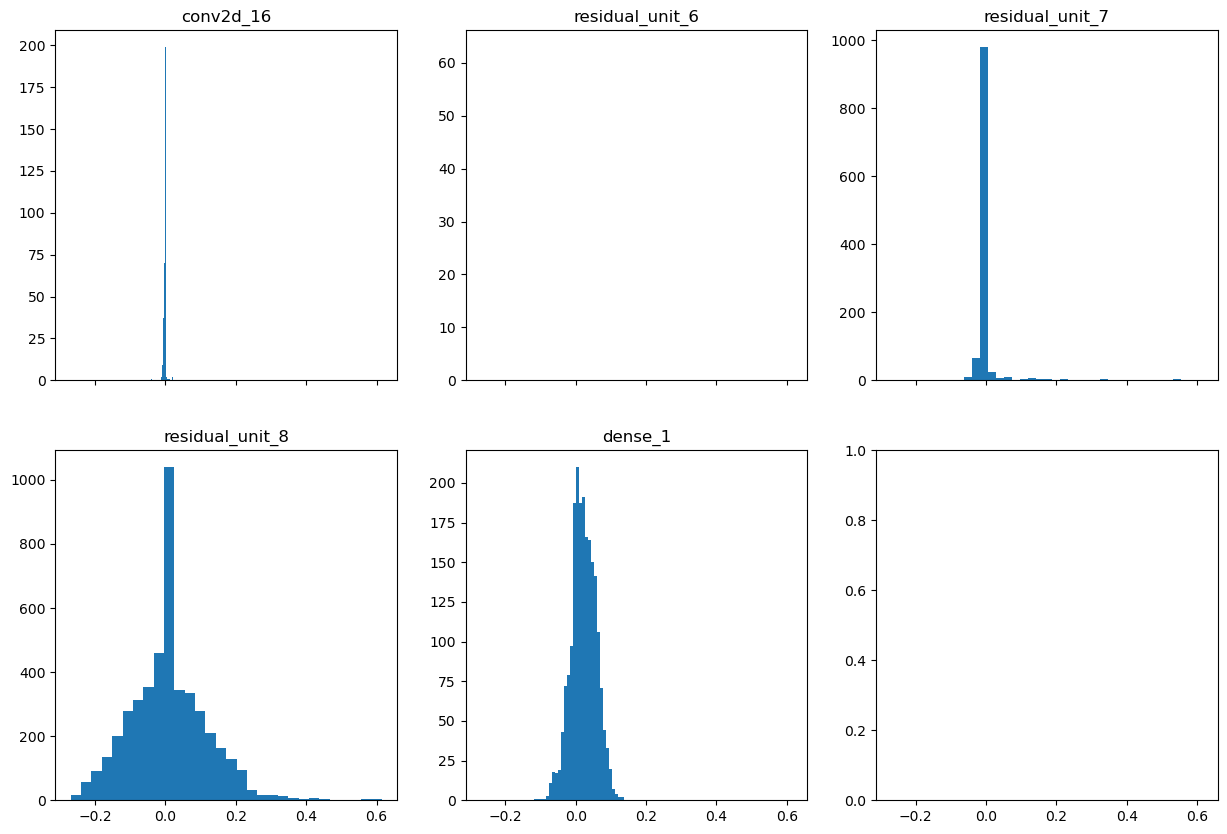

In [19]:

layer_weights = []
layer_names = []
for layer in best_model.layers:
    if len(layer.get_weights()) > 0:
        layer_weights.append(layer.get_weights())
        layer_names.append(layer.name)

leyer_nums = len(layer_weights)
col = 3
row = int(np.ceil(leyer_nums/col))

fig, axes = plt.subplots(row, col, figsize=(col*5, row*5), sharex=True, sharey=False)
axes = axes.flatten()

for i in range(leyer_nums):

    weights = layer_weights[i]
    name = layer_names[i]
    if len(weights) > 0:
        # 各層の重みの分布をグラフで可視化
        axes[i].hist(weights[0].flatten(), bins=30)
        axes[i].set_title(name)
        

### best model score

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = datagen.flow_from_directory(
    r'F:\miyata\RiverShapeRecognition_exp\image_for_datagen_ffwindow_comp\test',
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    color_mode='grayscale'
)

best_model.evaluate(test_generator)

Found 1125 images belonging to 2 classes.
36/36 [==============================] - 5s 122ms/step - loss: 0.0753 - accuracy: 0.9938


[0.07532725483179092, 0.9937777519226074]

### check model predict value

In [23]:
test_generator.class_indices

{'ULE_ffwindow': 0, 'langston_ffwindow': 1}

Found 1125 images belonging to 2 classes.
1/1 [==============================] - 0s 15ms/step


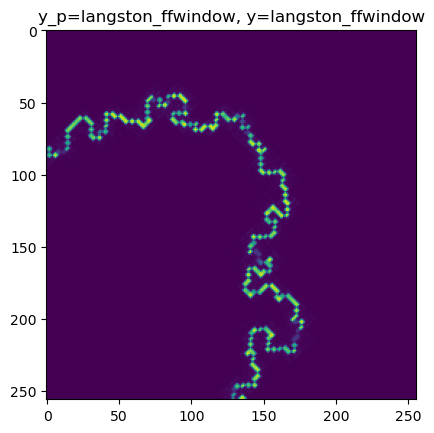

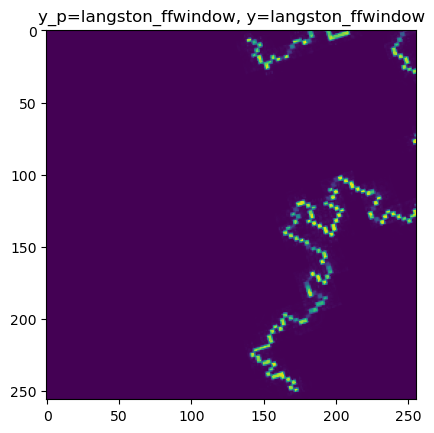

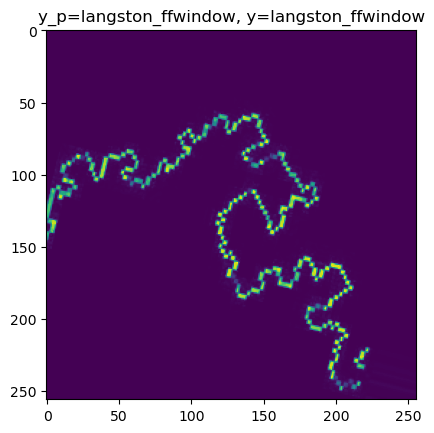

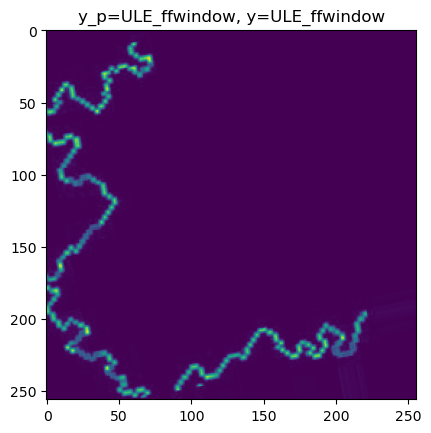

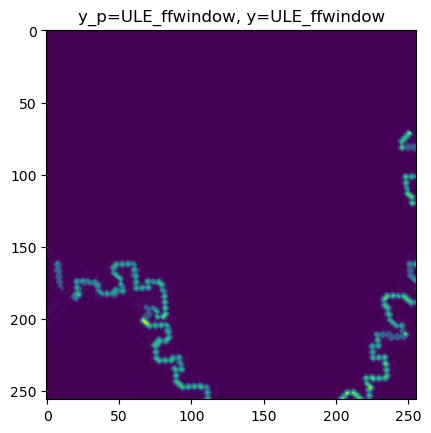

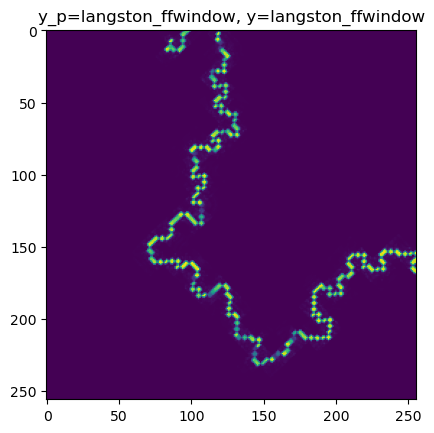

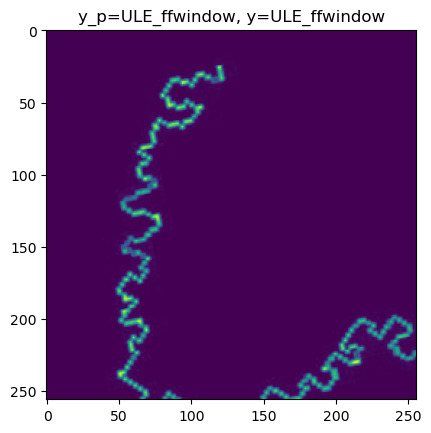

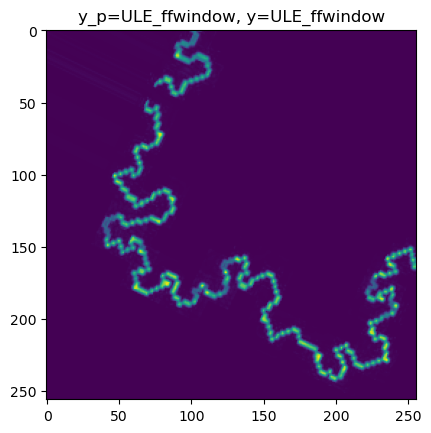

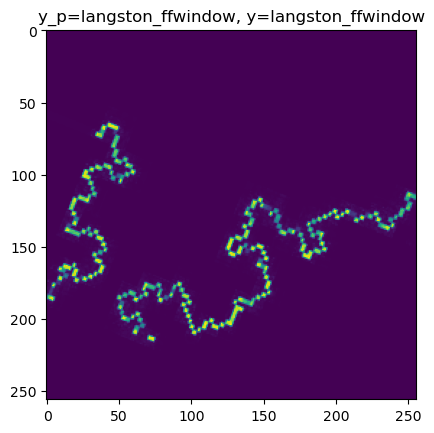

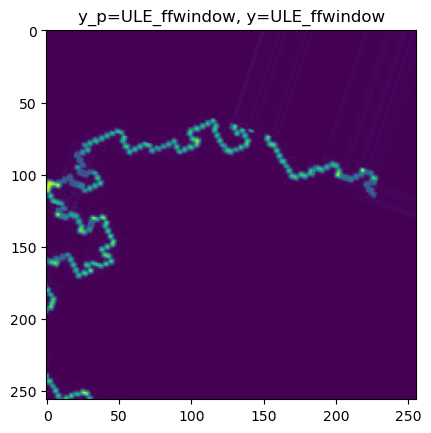

In [25]:

test_generator = datagen.flow_from_directory(
    r'F:\miyata\RiverShapeRecognition_exp\image_for_datagen_ffwindow_comp\test',
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
)

predictions = []
test_img, test_labels = next(test_generator)

num_of_shows = 10

for i in range(num_of_shows):
    # plt.figure()
    # plt.imshow(test_img[i].reshape(256, 256))
    # prob = best_model.predict(test_generator[i][0])
    # plt.title(prob)
    predictions.append(best_model.predict(test_generator[i][0]))
    # best_model.
    

predictions = np.array(predictions).flatten()
# print(predictions)

for i in range(num_of_shows):
    plt.figure()
    plt.imshow(test_img[i].reshape(256, 256))
    predict_cls_name = "langston_ffwindow" if predictions[i] > 0.5 else "ULE_ffwindow"
    cls_name = 'langston_ffwindow' if test_labels[i] == 1 else "ULE_ffwindow"
    plt.title(f"y_p={predict_cls_name}, y={cls_name}")

Found 17 images belonging to 2 classes.
1/1 [==============================] - 0s 364ms/step
[8.5951537e-01 9.4880801e-01 2.7286079e-08 1.7308301e-06 1.2543470e-01
 5.9200770e-01 3.1556597e-04 7.3988558e-05 5.4918963e-04 9.0537840e-01
 9.6350622e-01 8.9180541e-01 9.3712807e-01 3.0225858e-02 9.2814934e-01
 9.0366906e-01 8.9232367e-01]


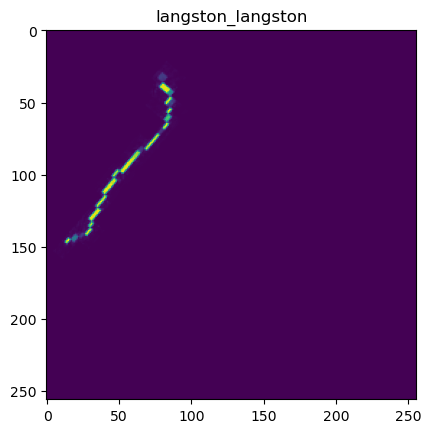

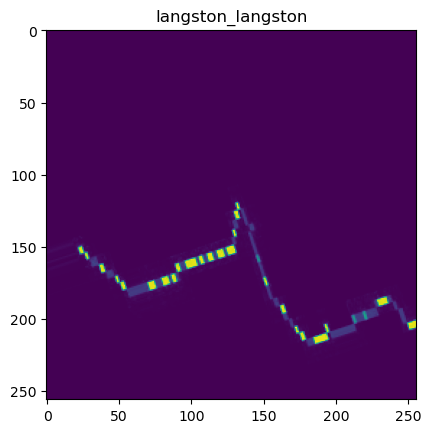

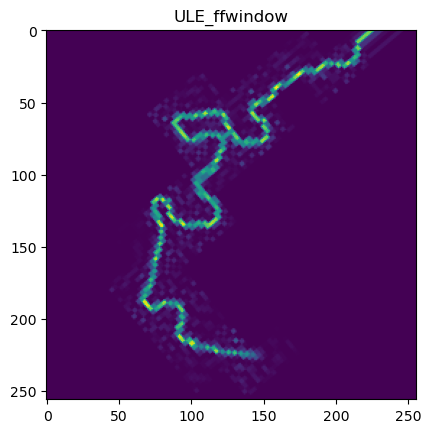

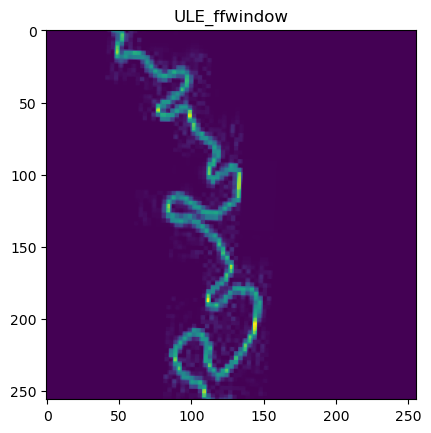

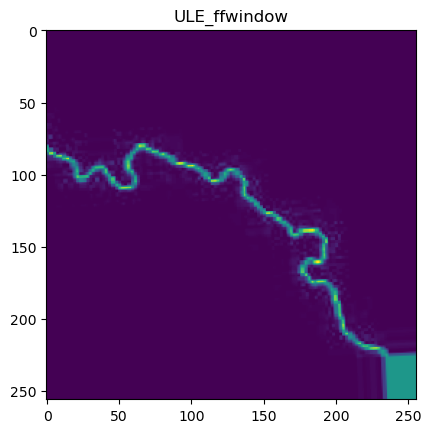

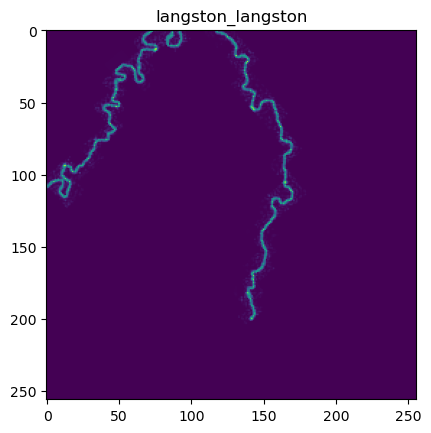

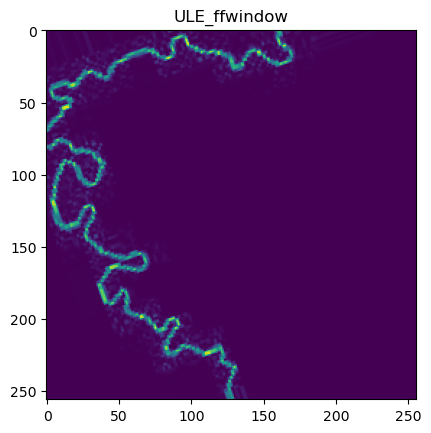

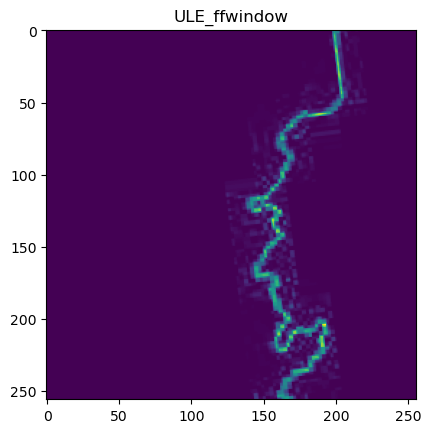

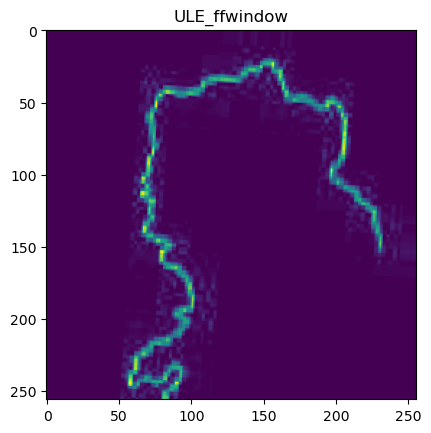

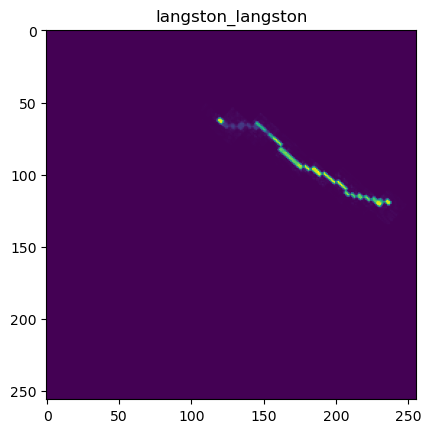

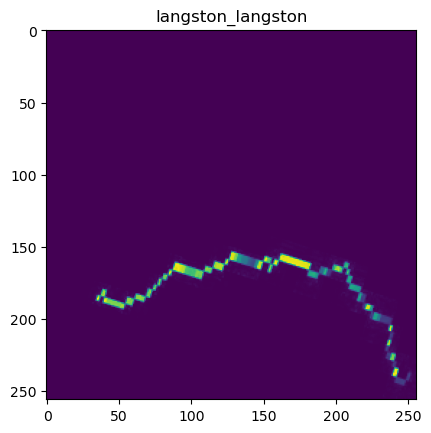

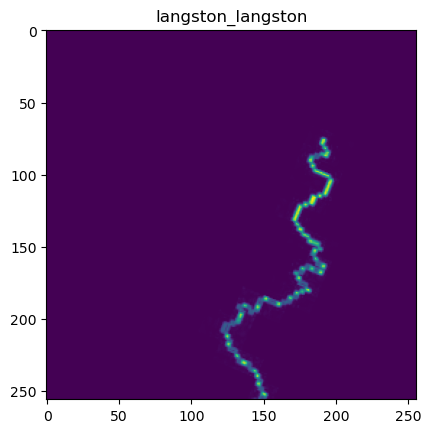

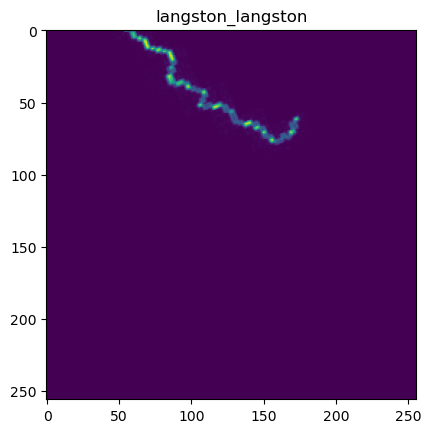

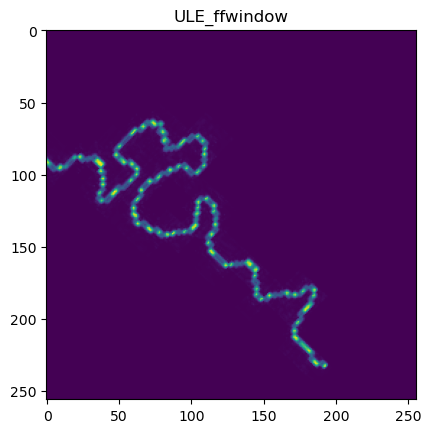

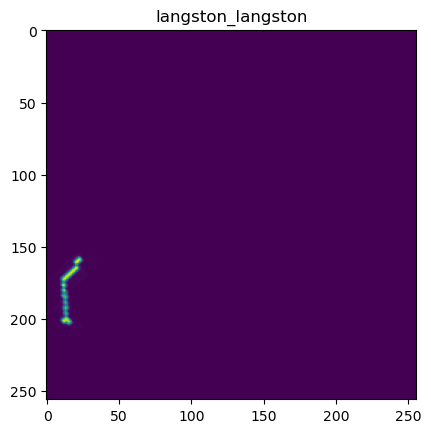

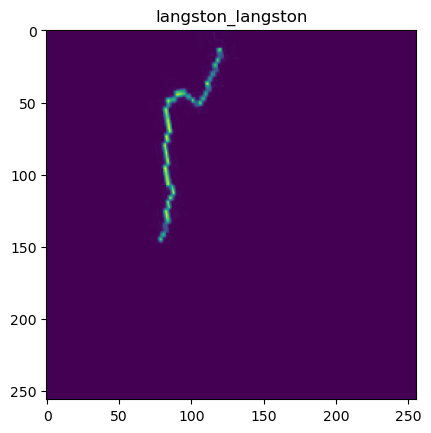

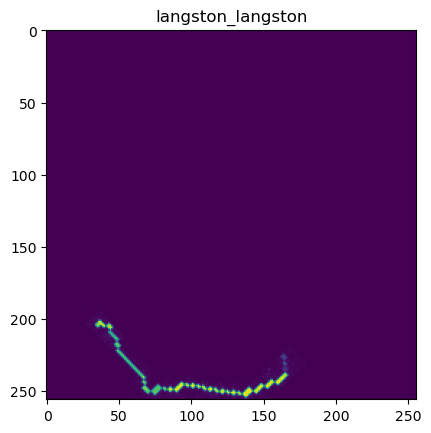

In [66]:

test_generator = datagen.flow_from_directory(
    r'F:\miyata\RiverShapeRecognition_exp\DEM east',
    target_size=shape,
    class_mode='binary',
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False
)

predictions = []
test_img, test_labels = next(test_generator)

for i in range(len(test_generator)):
    # plt.figure()
    # plt.imshow(test_img[i].reshape(256, 256))
    # prob = best_model.predict(test_generator[i][0])
    # plt.title(prob)
    predictions.append(best_model.predict(test_generator[i][0]))
    # best_model.
    

predictions = np.array(predictions).flatten()
print(predictions)

for i in range(len(test_img)):
    plt.figure()
    plt.imshow(test_img[i].reshape(256, 256))
    
    predict_cls_name = "langston_langston" if predictions[i] > 0.5 else "ULE_ffwindow"
    plt.title(predict_cls_name)

In [59]:
len(test_img)

10

In [64]:
prob_ULE_id = np.where(predictions<0.5)[0][0]
print(prob_ULE_id)
predictions[prob_ULE_id] 

3


0.00026565444

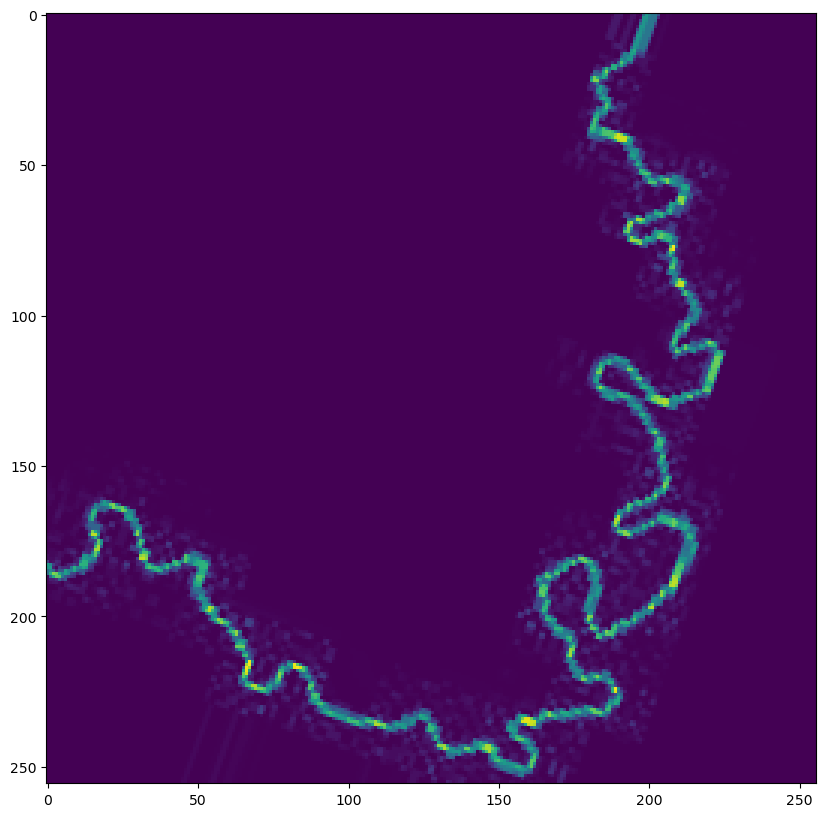

In [65]:
test_img, test_labels = next(test_generator)

plt.figure(figsize=(10, 10))
plt.imshow(test_img[prob_ULE_id].reshape(256, 256))

In [53]:
prob_ULE_id

6

In [55]:
type(test_img)

tuple

In [43]:
test_generator.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [44]:
test_generator.class_indices

{'ULE_ffwindow': 0, 'langston_langston': 1}